---
## IDENTIFICANDO AS ALUNAS  
---
* Carolina Passos Morelli Cunha –  rm351787

* Juliana Silva Nogueira - rm351237

---
## O PROBLEMA  
---
Imagine que você foi escalado para um time de investimentos e precisará realizar um modelo preditivo com dados da IBOVESPA (Bolsa de valores) para criar uma **série temporal** e prever diariamente o fechamento da base.
Para isso utilize a base de dados contida no site da investing e selecione o período “diário”, com o intervalo de tempo que achar adequado.
Você precisará demonstrar para o time de investimentos:

- O modelo com o storytelling, desde a captura do dado até a entrega do modelo;
- Justificar a técnica utilizada;
- Atingir uma acuracidade adequada (acima de 70%).

![IBOVESPA](https://s2-oglobo.glbimg.com/1yHApHvbxB8iWbMqFVp_JtlHHXU=/0x0:1070x487/888x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_da025474c0c44edd99332dddb09cabe8/internal_photos/bs/2022/1/E/UaPIBVQhyvBQ6BC5NQbQ/bolsa-de-valores-b3-edilson-dantas.jpg)

---
## COLETANDO DADOS

---

<font color='red'>**Instalando as Bibliotecas Necessárias**</font>

In [1]:
!pip install yfinance

<font color='red'>**Importando as bibliotecas utilizadas**</font>

In [46]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
#import numpy as np

<font color='red'>**Obtendo os dados no Yahoo Finance**</font>

In [3]:
# Especificando os parâmetros para coleta
symbol = '^BVSP'
start_date = '1994-02-01'
end_date = '2023-12-29'

# Use a função download para obter os dados
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


<font color='blue'>Iniciamos a extração dos dados **em 1994** devido ao *inicio do Plano Real*. Dessa forma, evitamos troca de moeda dentro do período analisado.</font>

In [4]:
# exibindo uma prévia do dataframe
display(df)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1994-02-01,740.599976,827.500000,740.599976,826.900024,826.900024,0
1994-02-02,826.900024,866.599976,819.799988,823.099976,823.099976,0
1994-02-03,823.099976,827.299988,794.000000,798.400024,798.400024,0
1994-02-04,798.400024,827.500000,798.400024,821.299988,821.299988,0
1994-02-07,821.299988,849.500000,820.299988,848.700012,848.700012,0
...,...,...,...,...,...,...
2023-12-21,130826.000000,132277.000000,130822.000000,132182.000000,132182.000000,8681000
2023-12-22,132553.000000,133035.000000,132094.000000,132753.000000,132753.000000,8231100
2023-12-26,132753.000000,133645.000000,132753.000000,133533.000000,133533.000000,0


---
## LIMPANDO E PREPARANDO OS DADOS
---

In [5]:
#Verificando a existência de nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7401 entries, 1994-02-01 to 2023-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7401 non-null   float64
 1   High       7401 non-null   float64
 2   Low        7401 non-null   float64
 3   Close      7401 non-null   float64
 4   Adj Close  7401 non-null   float64
 5   Volume     7401 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 404.7 KB


<font color='blue'>Não temos valores nulos no banco. Todas as colunas com 7401 dados.</font>

In [6]:
# Convertendo o campo de data para o formato datetime, e com isso se tornará uma coluna (deixando de ser o indice)
df = df.reset_index('Date')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-02-01,740.599976,827.500000,740.599976,826.900024,826.900024,0
1,1994-02-02,826.900024,866.599976,819.799988,823.099976,823.099976,0
2,1994-02-03,823.099976,827.299988,794.000000,798.400024,798.400024,0
3,1994-02-04,798.400024,827.500000,798.400024,821.299988,821.299988,0
4,1994-02-07,821.299988,849.500000,820.299988,848.700012,848.700012,0


In [7]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-02-01,740.599976,827.500000,740.599976,826.900024,826.900024,0
1,1994-02-02,826.900024,866.599976,819.799988,823.099976,823.099976,0
2,1994-02-03,823.099976,827.299988,794.000000,798.400024,798.400024,0
3,1994-02-04,798.400024,827.500000,798.400024,821.299988,821.299988,0
4,1994-02-07,821.299988,849.500000,820.299988,848.700012,848.700012,0
5,1994-02-08,848.700012,897.700012,848.700012,888.000000,888.000000,0
6,1994-02-09,888.000000,918.900024,888.000000,904.700012,904.700012,0
7,1994-02-10,904.700012,1001.200012,904.500000,1000.900024,1000.900024,0
8,1994-02-11,1000.900024,1047.699951,1000.900024,1035.400024,1035.400024,0
9,1994-02-17,1035.400024,1078.599976,1035.400024,1040.900024,1040.900024,0


<font color='red'>**Criando coluna com % de variação do fechamento**</font>

In [8]:
df["Variacao_Fechamento"] = df["Close"].pct_change(periods=1)*100
df['Variacao_Fechamento'] = df['Variacao_Fechamento'].fillna(0)

In [9]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Variacao_Fechamento
0,1994-02-01,740.599976,827.500000,740.599976,826.900024,826.900024,0,0.000000
1,1994-02-02,826.900024,866.599976,819.799988,823.099976,823.099976,0,-0.459554
2,1994-02-03,823.099976,827.299988,794.000000,798.400024,798.400024,0,-3.000845
3,1994-02-04,798.400024,827.500000,798.400024,821.299988,821.299988,0,2.868232
4,1994-02-07,821.299988,849.500000,820.299988,848.700012,848.700012,0,3.336177
5,1994-02-08,848.700012,897.700012,848.700012,888.000000,888.000000,0,4.630610
6,1994-02-09,888.000000,918.900024,888.000000,904.700012,904.700012,0,1.880632
7,1994-02-10,904.700012,1001.200012,904.500000,1000.900024,1000.900024,0,10.633360
8,1994-02-11,1000.900024,1047.699951,1000.900024,1035.400024,1035.400024,0,3.446898
9,1994-02-17,1035.400024,1078.599976,1035.400024,1040.900024,1040.900024,0,0.531196


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7401 entries, 0 to 7400
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 7401 non-null   datetime64[ns]
 1   Open                 7401 non-null   float64       
 2   High                 7401 non-null   float64       
 3   Low                  7401 non-null   float64       
 4   Close                7401 non-null   float64       
 5   Adj Close            7401 non-null   float64       
 6   Volume               7401 non-null   int64         
 7   Variacao_Fechamento  7401 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 462.7 KB


<font color='red'>**Conhecendo os dados, identificando padrões e encontrando anomalias**</font>

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Variacao_Fechamento
count,7401.000000,7401.000000,7401.000000,7401.000000,7401.000000,7.401000e+03,7401.000000
mean,48003.854169,48495.543400,47511.360532,48016.300284,48016.300284,6.248570e+06,0.091118
std,35265.283913,35562.027794,34980.881188,35279.391471,35279.391471,2.017975e+07,2.122433
min,740.599976,827.299988,740.599976,798.400024,798.400024,0.000000e+00,-15.809019
25%,13475.000000,13582.000000,13312.000000,13467.000000,13467.000000,0.000000e+00,-0.940499
50%,49218.000000,49799.000000,48573.000000,49212.000000,49212.000000,1.773200e+06,0.094125
75%,67058.000000,67618.000000,66494.000000,67068.000000,67068.000000,4.234500e+06,1.153113
max,134194.000000,134392.000000,133832.000000,134194.000000,134194.000000,2.322653e+08,33.419023


---
## Analisando a série temporal
---

<font color='blue'> O objetivo da análise de séries temporais é identificar padrões não aleatórios na série temporal de uma variável de interesse, e a observação deste comportamento passado pode permitir fazer previsões sobre o futuro, orientando a **tomada de decisões**. </font> 

<font color='blue'> A maneira tradicional de analisar uma série temporal é através da sua decomposição nos componentes de **tendência, sazonalidade e ruído.** </font> 

<font color='blue'> A **tendência** de uma série indica o seu comportamento “de longo prazo”, isto é, se ela cresce, decresce ou permanece estável, e qual a velocidade destas mudanças. Nos casos mais comuns trabalha-se com tendência constante, linear ou quadrática.</font> 

<font color='blue'> A **sazonalidade** (também denominada periodicidade) em uma série corresponde às oscilações de subida e de queda que sempre ocorrem em um determinado período do ano, do mês, da semana ou do dia. </font> 

<font color='blue'> O **ruído** é o que resta após extrair a tendência e a sazonalidade da série original. </font> 

<font color='red'>**Gerando um gráfico para visualizar a série temporal**</font>

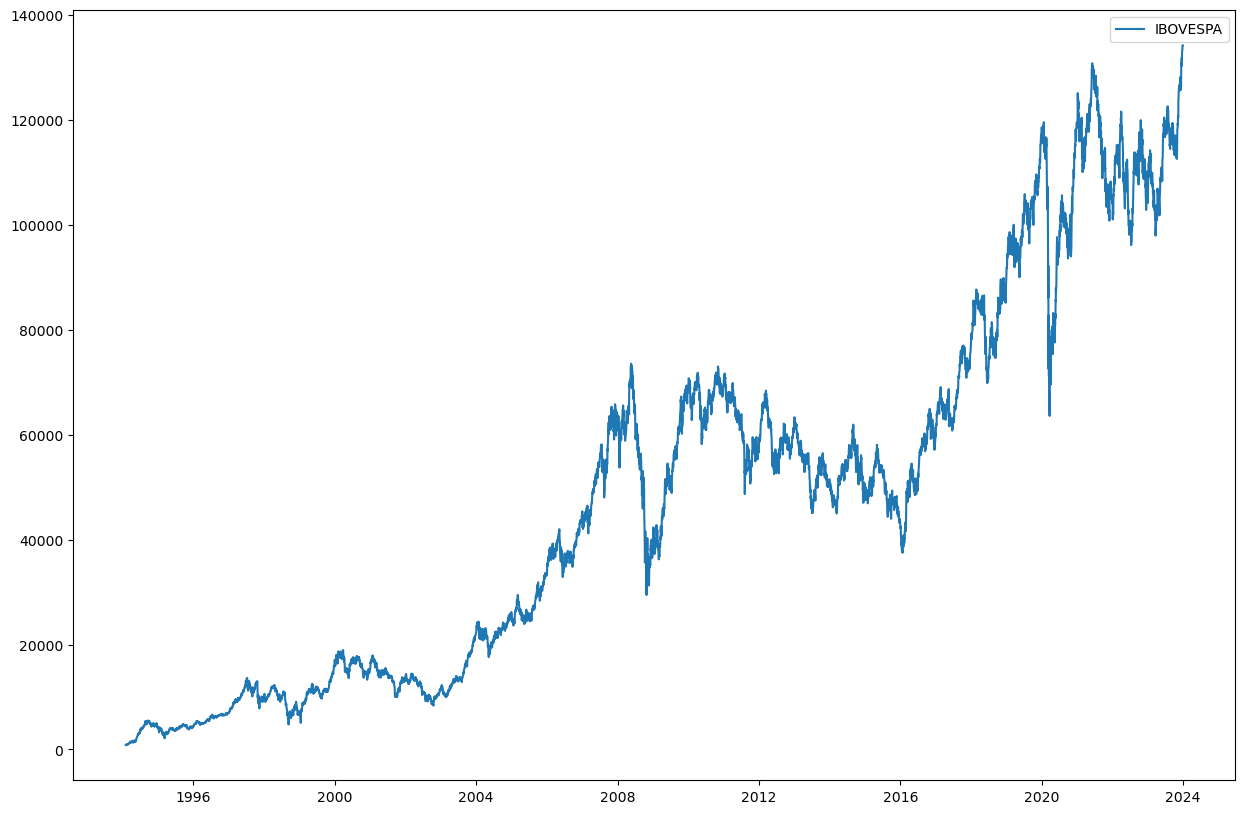

In [12]:
plt.figure(figsize = (15,10))
plt.plot(df["Date"], df["Close"], label="IBOVESPA")
plt.legend(loc='best')
plt.show()

<font color='red'>**Criando uma cópia do dataframe**</font>

In [13]:
df_ibovespa = df

<font color='red'>**Criando um dataframe apenas com informações de data e fechamento**</font>

In [14]:
df_close = df                                                              
df_close['Date'] = pd.to_datetime(df_close['Date'])
df_close = df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close','Variacao_Fechamento'])
df_close = df_close.set_index('Date')

In [15]:
df_close.head()

,Close
Date,
1994-02-01,826.900024
1994-02-02,823.099976
1994-02-03,798.400024
1994-02-04,821.299988
1994-02-07,848.700012


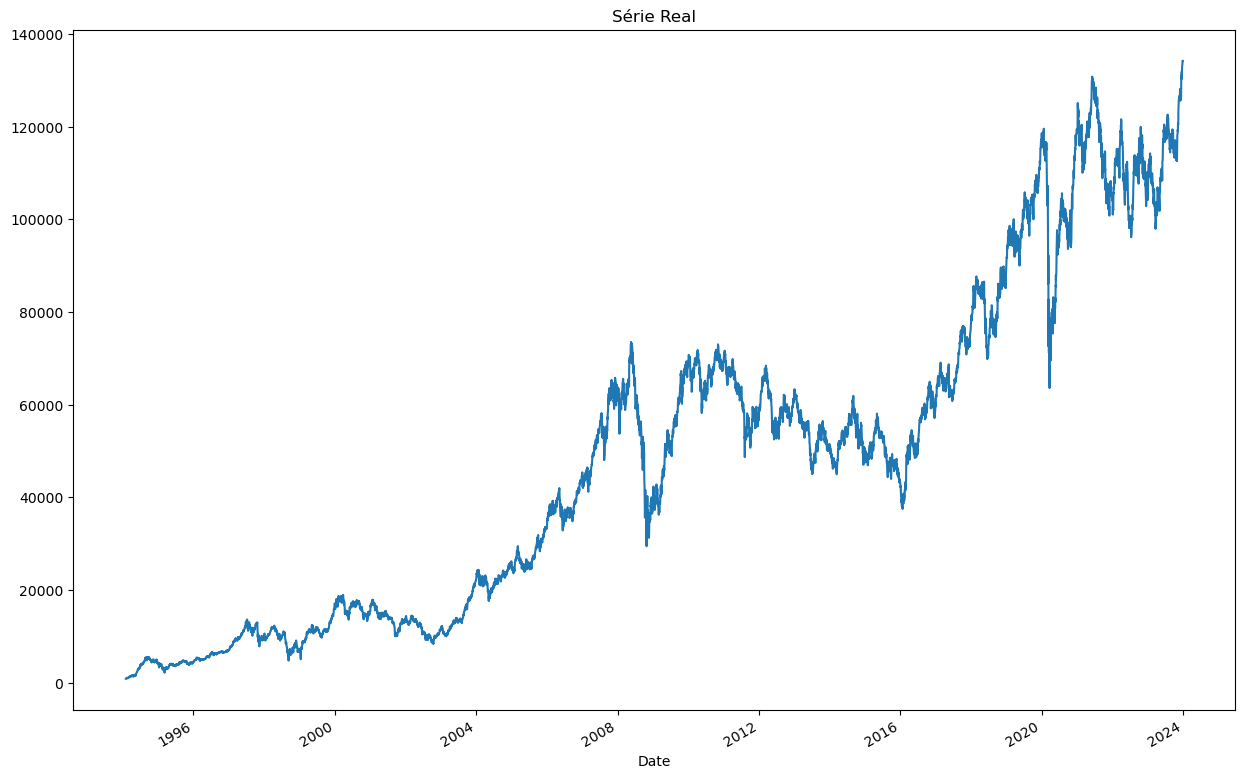

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

seasonplot = seasonal_decompose(df_close, model='additive', period=10) 

plt.figure(figsize=(15,10))
seasonplot.observed.plot()
plt.gca().set_title("Série Real")
plt.show()

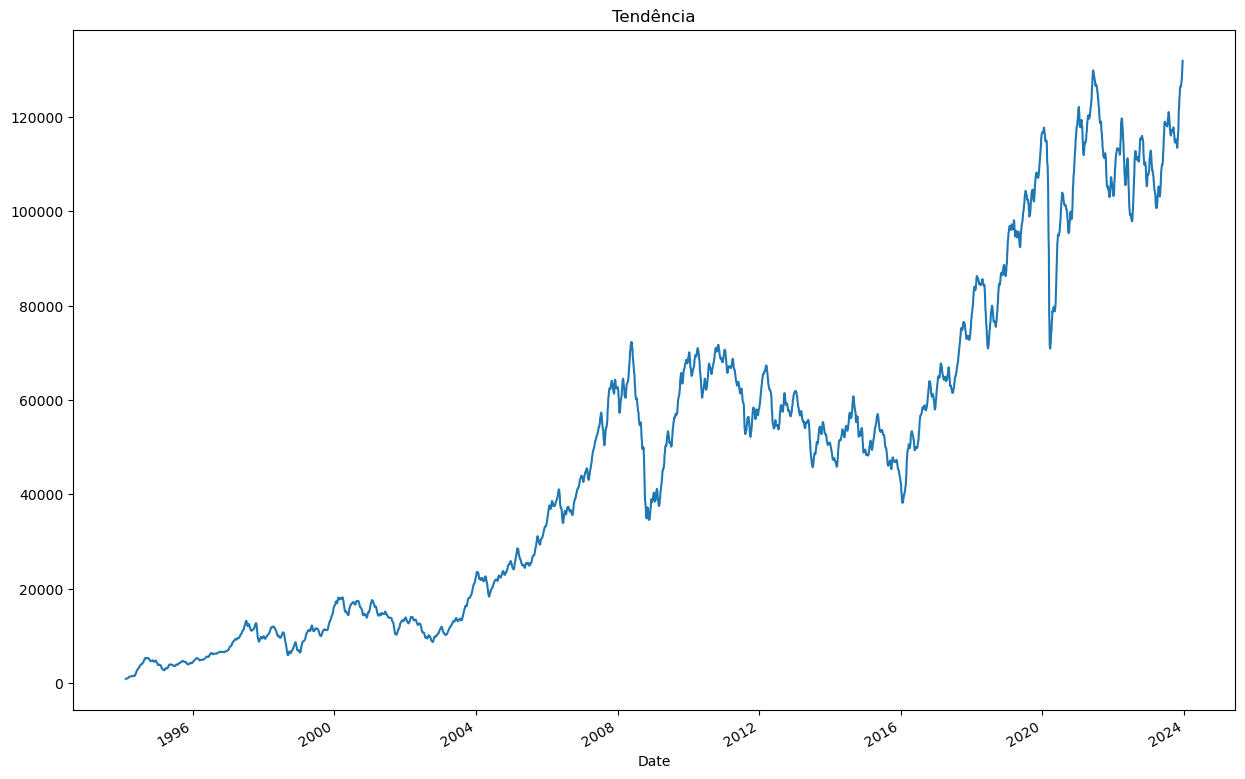

In [17]:
plt.figure(figsize=(15,10))
seasonplot.trend.plot()
plt.gca().set_title("Tendência")
plt.show()

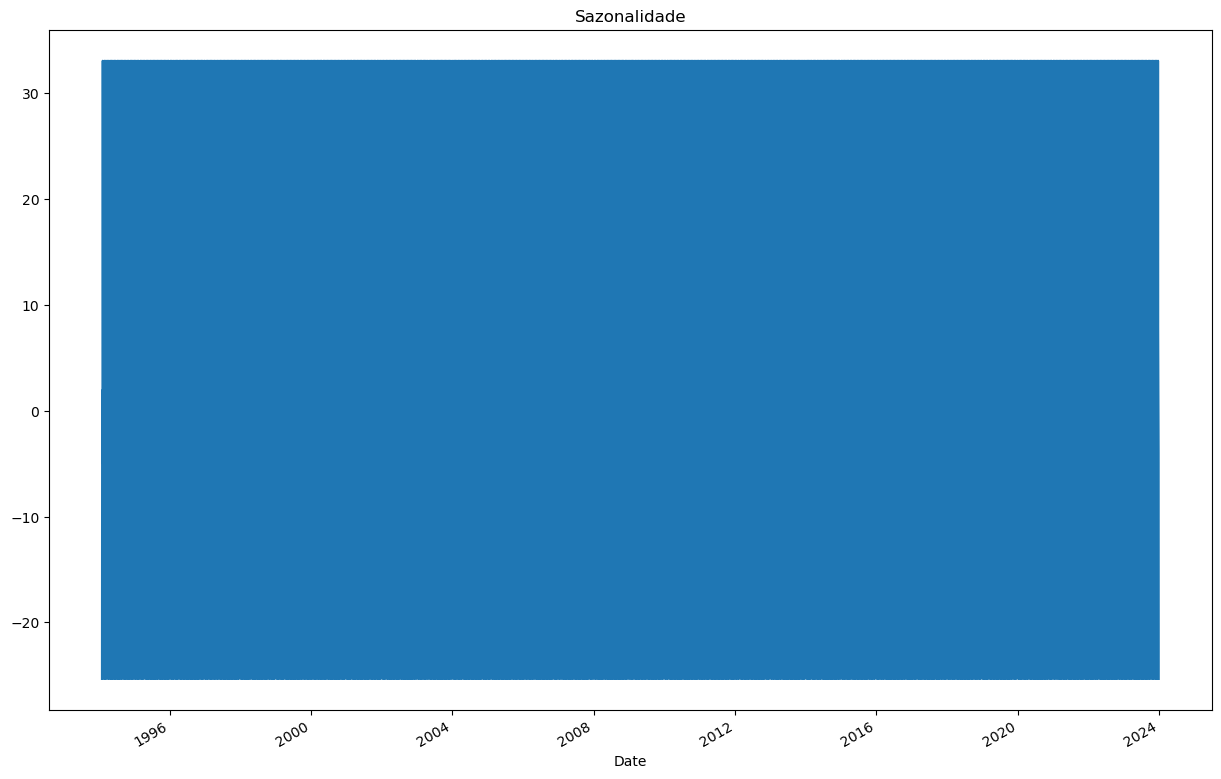

In [18]:
plt.figure(figsize=(15,10))
seasonplot.seasonal.plot()
plt.gca().set_title("Sazonalidade")
plt.show()

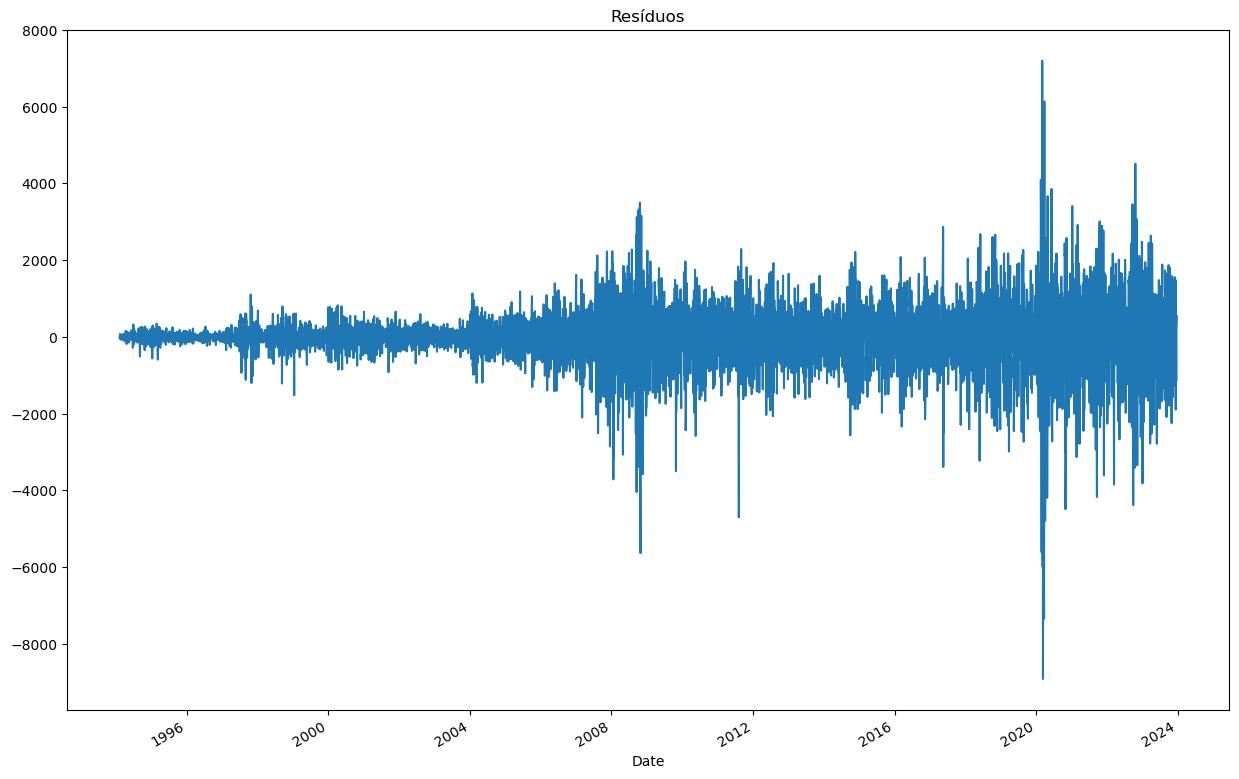

In [19]:
plt.figure(figsize=(15,10))
seasonplot.resid.plot()
plt.gca().set_title("Resíduos")
plt.show()

<font color='blue'> Foi utilizado o **modelo aditivo** na decomposição, pois a sazonalidade não apresentou variação com a tendência. </font>

<font color='red'>**Analisando a correlação dos dados**</font>

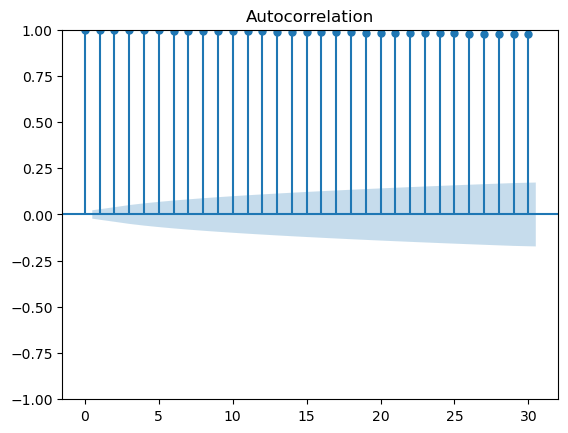

In [40]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_close, lags=30)
plt.show()

<Figure size 1500x1000 with 0 Axes>

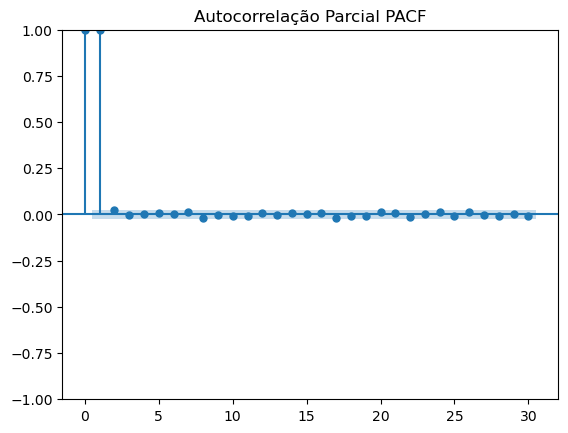

In [41]:
plt.figure(figsize=(15,10))
sm.graphics.tsa.plot_pacf(df_close, lags=30)
plt.gca().set_title("Autocorrelação Parcial PACF")
plt.show()

???? Fazer analise dos graficos acima

<font color='red'>**Modelos ARIMA**</font>

<font color='red'>**Porque o IBOVESTA esta subindo???**</font>

<font color='blue'> Alguns motivos para explicar a alta do IBOVESPA:  <br>1. Juros caindo e expectativa de juros mais baixos fazem com que grande parte dos investidores (leia-se fundos de investimentos) precisem ajustar a carteira para entregar resultado, então é normal ver uma realocação de títulos de renda fixa para mercado de renda variável, aumentando a procura por ações. <br>   
2. Com a queda de juros as empresas passam a pagar menos juros sobre as suas dívidas e pouco a pouco o resultado consolidado vai melhorando. Vale olhar sob a ótica também do resultado financeiro da população que com juros menores tem menores dívidas, menores parcelas e, consequentemente, mais dinheiro para gastar. Aqui podemos citar exemplos como o mercado de varejo e o mercado imobiliário que andam de forma inversa ao movimento de juros. <br>   
3. É inegável que as empresas no Brasil estão baratas. Há inúmeros jeitos de modelar o valor justo de uma empresa e em todas elas, o Brasil parece ser um País barato, com ações valendo muito abaixo da média histórica na relação de Preço/Lucro e também quando comparamos nossas empresas à outras latinas ou de países emergentes.  
</font>

[FONTE](https://einvestidor.estadao.com.br/colunas/vitor-miziara/ibovespa-sobe-contramao-resultados-piores-empresas/)

---
## MODELANDO A SÉRIE TEMPORAL
---

In [21]:
! pip install scikit-learn

In [44]:
from sklearn.model_selection import train_test_split # selecionando uma parte da biblioteca